<a href="https://colab.research.google.com/github/TasneemBadry/TasneemBadry/blob/main/Machine_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Import Library

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import precision_score, recall_score, accuracy_score, confusion_matrix
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn import svm
from sklearn.svm import SVC
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

#Read dataset file & Information about it

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
datafile = pd.read_csv("/content/drive/MyDrive/Dataset_Network .csv")

In [5]:
datafile.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 312670 entries, 0 to 312669
Data columns (total 20 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Unique ID     312670 non-null  int64  
 1   LABEL         312670 non-null  object 
 2   REG           312670 non-null  object 
 3   MCK           312670 non-null  int64  
 4   LCR           312670 non-null  float64
 5   LU            312670 non-null  int64  
 6   PP            312670 non-null  float64
 7   USER_NETWORK  279655 non-null  object 
 8   MANUFACTURE   279655 non-null  object 
 9   HS_VOLTE      269438 non-null  object 
 10  CUST_CAT      280918 non-null  object 
 11  SIM_TYPE      307369 non-null  object 
 12  PROV_4G       312670 non-null  object 
 13  PROV_VOLTE    312670 non-null  object 
 14  D2G           312670 non-null  float64
 15  D3G           312670 non-null  float64
 16  D4G           312670 non-null  float64
 17  V2G           312670 non-null  float64
 18  V3G 

In [6]:
datafile.isnull().sum()

Unique ID           0
LABEL               0
REG                 0
MCK                 0
LCR                 0
LU                  0
PP                  0
USER_NETWORK    33015
MANUFACTURE     33015
HS_VOLTE        43232
CUST_CAT        31752
SIM_TYPE         5301
PROV_4G             0
PROV_VOLTE          0
D2G                 0
D3G                 0
D4G                 0
V2G                 0
V3G                 0
V4G                 0
dtype: int64

#Preprocessing

In [7]:
# Find the duplicate rows
duplicate_rows = datafile[datafile.duplicated()]

# Print the duplicate rows
print(duplicate_rows)

Empty DataFrame
Columns: [Unique ID, LABEL, REG, MCK, LCR, LU, PP, USER_NETWORK, MANUFACTURE, HS_VOLTE, CUST_CAT, SIM_TYPE, PROV_4G, PROV_VOLTE, D2G, D3G, D4G, V2G, V3G, V4G]
Index: []


In [8]:
# Drop the duplicate rows
datafile.drop_duplicates()

,Unique ID,LABEL,REG,MCK,LCR,LU,PP,USER_NETWORK,MANUFACTURE,HS_VOLTE,CUST_CAT,SIM_TYPE,PROV_4G,PROV_VOLTE,D2G,D3G,D4G,V2G,V3G,V4G
0,1,d,DELTA,11,0.00,57,0.00,4G,Samsung,Y,Core,Y,Y,Y,0.00,6.58,93.42,0.00,100.00,0.00
1,2,p,UPPER EGYPT,0,0.01,288,0.02,2G,HMD Global Oy,N,Core,Y,Y,Y,0.00,0.00,0.00,100.00,0.00,0.00
2,3,d,ALEXANDRIA,16,0.08,87,0.00,4G,Xiaomi Communications Co Ltd,Y,Core,Y,Y,Y,0.00,0.00,0.00,4.88,95.12,0.00
3,4,d,DELTA,0,0.35,990,0.01,NaN,NaN,NaN,Med-High,N,N,N,0.82,99.18,0.00,34.29,65.71,0.00
4,5,p,CANAL,2,0.04,182,0.30,4G,INFINIX TECHNOLOGY LIMITED,N,Med-Low,Y,Y,Y,0.00,0.03,99.97,0.56,99.44,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
312665,312661,d,GIZA,0,0.18,290,0.00,4G,Realme Chongqing Mobile Telecommunications Cor...,N,NaN,NaN,N,N,0.00,0.00,100.00,19.54,80.46,0.00
312666,312662,d,DELTA,75,0.07,1240,0.01,3G,Samsung Korea,N,NaN,NaN,N,N,0.23,99.77,0.00,7.61,92.39,0.00
312667,312663,d,DELTA,179,0.78,3370,0.00,NaN,NaN,NaN,NaN,NaN,N,N,3.47,27.55,68.98,23.14,76.86,0.00
312668,312664,d,DELTA,78,0.04,1813,0.54,NaN,NaN,NaN,NaN,NaN,N,N,1.00,24.22,74.78,8.53,85.82,5.65


In [9]:
datafile['D2G'].fillna(value=datafile['D2G'].mean(),inplace=True)
datafile['D3G'].fillna(value=datafile['D3G'].mean(),inplace=True)
datafile['D4G'].fillna(value=datafile['D4G'].mean(),inplace=True)
datafile['V2G'].fillna(value=datafile['V2G'].mean(),inplace=True)
datafile['V3G'].fillna(value=datafile['V3G'].mean(),inplace=True)
datafile['V4G'].fillna(value=datafile['V4G'].mean(),inplace=True)

In [10]:
datafile.dropna(inplace=True)

In [11]:
datafile.drop(['Unique ID'], axis= 1, inplace= True)

In [12]:
l = preprocessing.LabelEncoder()
datafile[['LABEL','REG','USER_NETWORK','MANUFACTURE','HS_VOLTE','CUST_CAT','SIM_TYPE','PROV_4G','PROV_VOLTE']] = datafile[['LABEL','REG','USER_NETWORK','MANUFACTURE','HS_VOLTE','CUST_CAT','SIM_TYPE','PROV_4G','PROV_VOLTE']].apply(l.fit_transform)

In [13]:
# Calculate the IQR
q1 = np.percentile(datafile, 25)
q3 = np.percentile(datafile, 75)
iqr = q3 - q1

# Define the lower and upper bounds for outliers
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

# Identify the outliers
outliers = datafile[datafile < lower_bound] | datafile[datafile > upper_bound]

print(outliers)

        LABEL    REG    MCK    LCR     LU     PP  USER_NETWORK  MANUFACTURE  \
0       False  False  False  False  False  False         False        False   
1       False  False  False  False  False  False         False        False   
2       False  False  False  False  False  False         False        False   
4       False  False  False  False  False  False         False        False   
5       False  False  False  False  False  False         False        False   
...       ...    ...    ...    ...    ...    ...           ...          ...   
312489  False  False  False  False  False  False         False        False   
312490  False  False  False  False  False  False         False        False   
312491  False  False  False  False  False  False         False        False   
312492  False  False  False  False  False  False         False        False   
312494  False  False  False  False  False  False         False        False   

        HS_VOLTE  CUST_CAT  SIM_TYPE  PROV_4G  PROV

#EDA

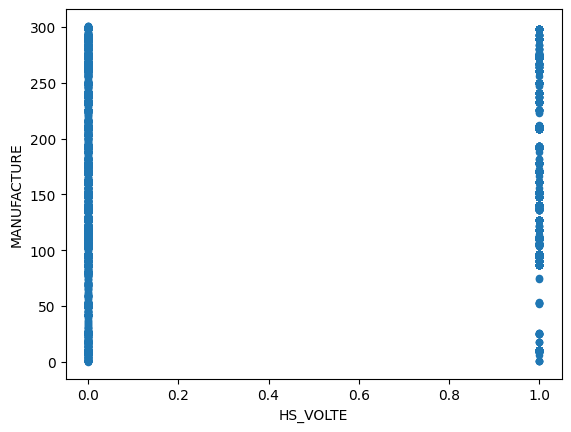

In [14]:
datafile.plot(x='HS_VOLTE',y='MANUFACTURE',kind='scatter')
plt.show()

<Axes: xlabel='REG', ylabel='count'>

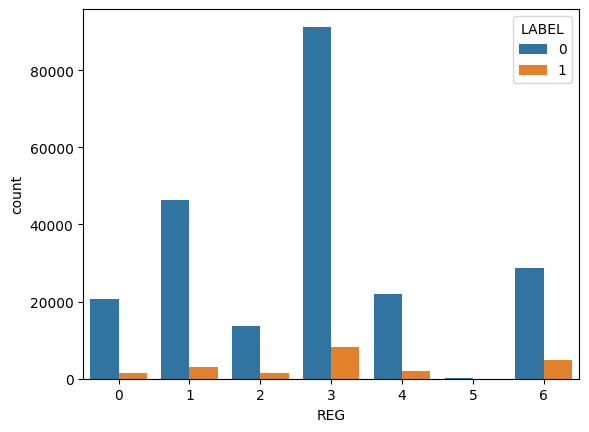

In [15]:
sns.countplot(x=datafile['REG'],hue=datafile['LABEL'],data=datafile)

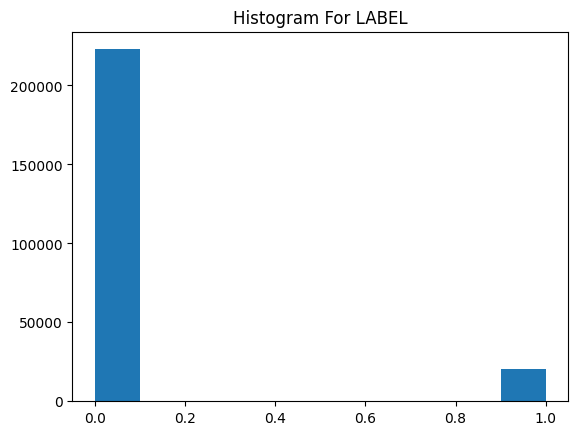

In [16]:
s=datafile['LABEL']
plt.title('Histogram For LABEL')
plt.hist(s,bins=10)
plt.show()

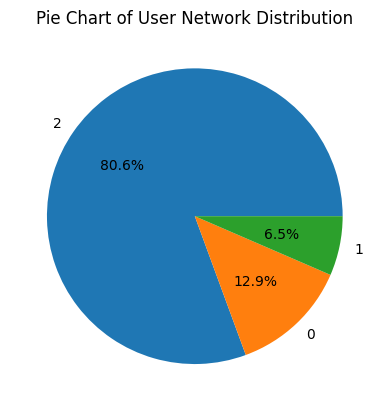

In [17]:
# Get the number of customers in each user network
n_customer_per_network = datafile['USER_NETWORK'].value_counts().sort_values(ascending=False)

# Get the names of the user networks
networks = n_customer_per_network.index.to_list()

# Get the number of customers in each user network
n_customers = n_customer_per_network.to_list()

# Create a pie chart of the data
plt.pie(n_customers, labels=networks, autopct="%1.1f%%")
plt.title("Pie Chart of User Network Distribution")
plt.show()

#Data Splitting

In [18]:
x=datafile.iloc[:,1:]
y=datafile.iloc[:,:1]

In [19]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2 , random_state = 3)

#Models

1)Decision_Tree

In [20]:
DT = DecisionTreeClassifier()
DT.fit(x_train, y_train)
y_pred = DT.predict(x_test)
accuracy = round(accuracy_score(y_test, y_pred)*100)
precision = round(precision_score(y_test, y_pred,average = 'macro')*100)
recall = round(recall_score(y_test, y_pred,average='macro')* 100)

print('Precision: ', precision,"%")
print('Recall: ', recall,"%")
print('Accuracy:', accuracy,"%")

Precision:  52 %
Recall:  53 %
Accuracy: 84 %


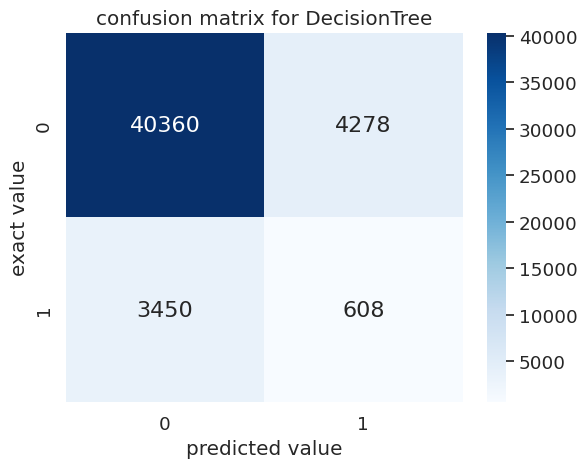

In [21]:
#confusion matrix for DecisionTree
con_matrrix = confusion_matrix(y_test, y_pred)

#Create a heatmap of the confusion matrix
sns.set(font_scale=1.2) # Set font size
sns.heatmap(con_matrrix, annot=True, annot_kws={"size": 16}, cmap='Blues', fmt='g') # Create heatmap

#Add Labels and title
plt.xlabel('predicted value')
plt.ylabel('exact value')
plt.title('confusion matrix for DecisionTree')

plt.show()

2)SVM

In [22]:
sm = SVC()
sm.fit(x_train, y_train)
y_pred = sm.predict(x_test)
accuracy = round(accuracy_score(y_test, y_pred)*100)
precision = round(precision_score(y_test, y_pred,average = 'macro')*100)
recall = round(recall_score(y_test, y_pred,average='macro')* 100)

print('Precision: ', precision,"%")
print('Recall: ', recall,"%")
print('Accuracy:', accuracy,"%")

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Precision:  46 %
Recall:  50 %
Accuracy: 92 %


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


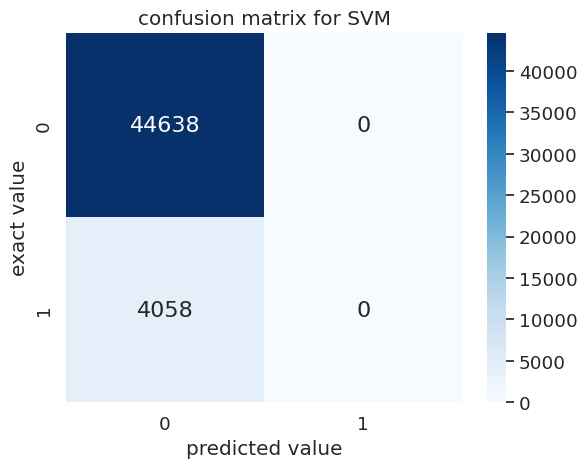

In [23]:
#confusion matrix for SVM
con_matrrix = confusion_matrix(y_test, y_pred)

#Create a heatmap of the confusion matrix
sns.set(font_scale=1.2) # Set font size
sns.heatmap(con_matrrix, annot=True, annot_kws={"size": 16}, cmap='Blues', fmt='g') # Create heatmap

#Add Labels and title
plt.xlabel('predicted value')
plt.ylabel('exact value')
plt.title('confusion matrix for SVM')

plt.show()

3)Naive Bays

In [24]:
gnb = GaussianNB()
gnb.fit(x_train, y_train)
y_pred = gnb.predict(x_test)
accuracy = round(accuracy_score(y_test, y_pred) * 100)
precision = round(precision_score(y_test, y_pred,average = 'macro')*100)
recall = round(recall_score(y_test, y_pred,average='macro')* 100)

print('Precision: ', precision,"%")
print('Recall: ', recall,"%")
print('Accuracy:', accuracy,"%")

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Precision:  52 %
Recall:  54 %
Accuracy: 80 %


Text(0.5, 1.0, 'confusion matrix for Naive Bays')

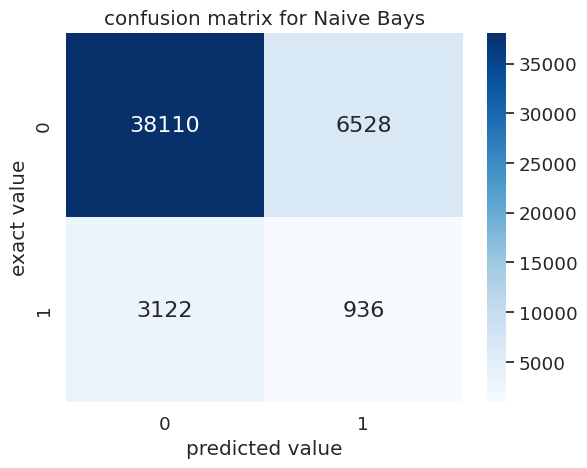

In [25]:
#confusion matrix for Naive Bays
con_matrrix = confusion_matrix(y_test, y_pred)

#Create a heatmap of the confusion matrix
sns.set(font_scale=1.2) # Set font size
sns.heatmap(con_matrrix, annot=True, annot_kws={"size": 16}, cmap='Blues', fmt='g') # Create heatmap

#Add Labels and title
plt.xlabel('predicted value')
plt.ylabel('exact value')
plt.title('confusion matrix for Naive Bays')

4)Logistic Regression

In [26]:
LRmodel = LogisticRegression()
LRmodel.fit(x_train, y_train)
y_pred = LRmodel.predict(x_test)
accuracy = round(accuracy_score(y_test, y_pred)*100)
precision = round(precision_score(y_test, y_pred,average = 'macro')*100)
recall = round(recall_score(y_test, y_pred,average='macro')* 100)

print('Precision: ', precision,"%")
print('Recall: ', recall,"%")
print('Accuracy:', accuracy,"%")

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Precision:  48 %
Recall:  50 %
Accuracy: 92 %


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Text(0.5, 1.0, 'confusion matrix for LogisticRegression')

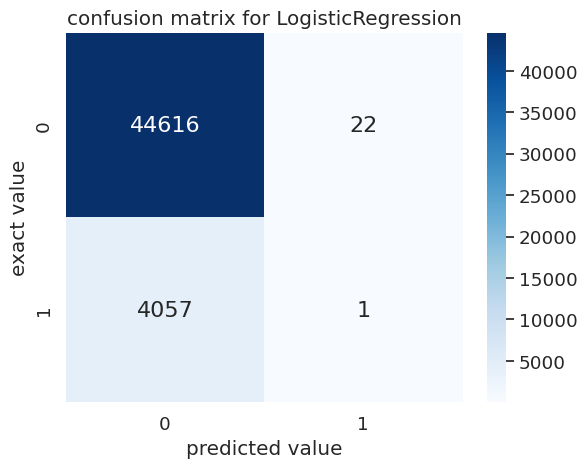

In [27]:
#confusion matrix for LogisticRegression
con_matrrix = confusion_matrix(y_test, y_pred)

#Create a heatmap of the confusion matrix
sns.set(font_scale=1.2) # Set font size
sns.heatmap(con_matrrix, annot=True, annot_kws={"size": 16}, cmap='Blues', fmt='g') # Create heatmap

#Add Labels and title
plt.xlabel('predicted value')
plt.ylabel('exact value')
plt.title('confusion matrix for LogisticRegression')

5)Linear Regression

In [28]:
from sklearn.metrics import mean_squared_error
linear=LinearRegression()
linear.fit(x_train, y_train)
y_pred = linear.predict(x_test)
mse = round(mean_squared_error(y_test, y_pred)*100)

print('MSE:', mse)

MSE: 7


6)Random Forest

In [29]:
model= RandomForestClassifier()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
accuracy = round(accuracy_score(y_test, y_pred)*100)
precision = round(precision_score(y_test, y_pred,average = 'macro')*100)
recall = round(recall_score(y_test, y_pred,average='macro')* 100)

print('Precision: ', precision,"%")
print('Recall: ', recall,"%")
print('Accuracy:', accuracy,"%")

<ipython-input-29-d937115b4a67>:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(x_train, y_train)


Precision:  61 %
Recall:  50 %
Accuracy: 92 %


Text(0.5, 1.0, 'confusion matrix for RandomForest')

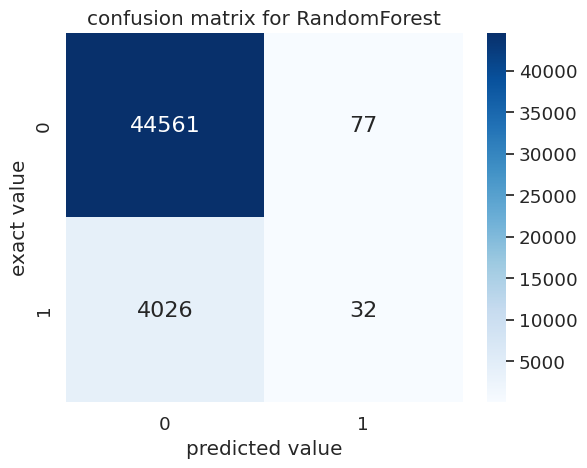

In [30]:
#confusion matrix for RandomForest
con_matrrix = confusion_matrix(y_test, y_pred)

#Create a heatmap of the confusion matrix
sns.set(font_scale=1.2) # Set font size
sns.heatmap(con_matrrix, annot=True, annot_kws={"size": 16}, cmap='Blues', fmt='g') # Create heatmap

#Add Labels and title
plt.xlabel('predicted value')
plt.ylabel('exact value')
plt.title('confusion matrix for RandomForest')

7)KNN

In [31]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(x_train, y_train)
y_pred = knn.predict(x_test)
accuracy = round(accuracy_score(y_test, y_pred)*100)
precision = round(precision_score(y_test, y_pred,average = 'macro')*100)
recall = round(recall_score(y_test, y_pred,average='macro')* 100)

print('Precision: ', precision,"%")
print('Recall: ', recall,"%")
print('Accuracy:', accuracy,"%")

/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Precision:  53 %
Recall:  51 %
Accuracy: 90 %


Text(0.5, 1.0, 'confusion matrix for KNN')

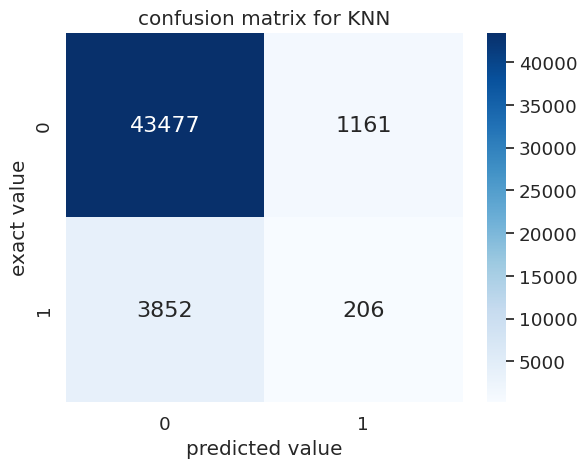

In [32]:
#confusion matrix for knn
con_matrrix = confusion_matrix(y_test, y_pred)

#Create a heatmap of the confusion matrix
sns.set(font_scale=1.2) # Set font size
sns.heatmap(con_matrrix, annot=True, annot_kws={"size": 16}, cmap='Blues', fmt='g') # Create heatmap

#Add Labels and title
plt.xlabel('predicted value')
plt.ylabel('exact value')
plt.title('confusion matrix for KNN')